<a href="https://colab.research.google.com/github/GuCuChiara/Instalacion_SNOMED-CT_localhost/blob/main/SNOMED_CT_AR_INST_LOCAL_Funcional_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------------------------
# Instalación local de SNOMED-CT en entorno Windows 10-11
---------------------------------------------------------------

---

## **Snowstorm** es un servidor terminológico de código abierto con compatibilidad específica con SNOMED CT.
* Está basado en Elasticsearch, con un enfoque en el rendimiento y la escalabilidad empresarial.

* **Elasticsearch** es un motor de búsqueda y análisis distribuido de código abierto, diseñado para aplicaciones de velocidad, escalabilidad e IA.

## APIs:
## Snowstorm cuenta con dos API:

### API HL7 FHIR 🔥
* Implementa el módulo de terminología
* Recomendado para implementadores
* Compatible con SNOMED CT, LOINC, ICD-10, ICD-10-CM y otros sistemas de código

### API especializada de SNOMED CT
* Compatible con la gestión de sistemas de código de SNOMED CT
* Compatible con el navegador de SNOMED CT
* Compatible con la creación de ediciones de SNOMED CT
* Recomendaciones para implementadores
* SNOMED International recomienda que los implementadores de SNOMED CT utilicen un servicio terminológico, como Snowstorm, y una interfaz estándar, como la API HL7 FHIR.

- Este enfoque permite un acoplamiento flexible de aplicaciones, así como el acceso a potentes funciones terminológicas.

- Snowstorm es una buena opción para equipos que están empezando o que cuentan con capacidad de terminología y soporte técnico.

### Compatibilidad con el navegador SNOMED CT
* Snowstorm proporciona la API del servidor terminológico para el navegador internacional SNOMED, ​​incluyendo la Edición Internacional y unas catorce ediciones nacionales.

* Snowstorm puede utilizarse en implementaciones locales para consultar SNOMED CT con las siguientes funciones:

### Alojamiento de múltiples extensiones junto con la Edición Internacional de SNOMED CT
* Búsqueda y recuperación de contenido multilingüe
* Totalmente compatible con ECL v2.0
* Historial completo (depende de la importación completa de RF2)
* API FHIR de solo lectura 🔥


---

## 1) Requisitos de hardware y software utilizado:

* Por lo menos 16gb de memoria RAM
* Si se tiene 8gb de RAM, asignar por lo menos 8gb de memoria virtual en el sistema.

### Software utilizado (puede haber nuevas versiones):
* **elasticsearch-8.11.1**
  * (link de descarga: https://www.elastic.co/downloads/past-releases?product=elasticsearch)

  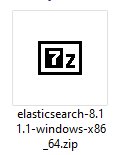

* **Snowstorm 10.10.1**
  * (link de descarga: https://github.com/IHTSDO/snowstorm/releases/download/10.10.1/snowstorm-10.10.1.jar)

  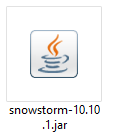

* **Paquetes de SNOMED-CT descargados del NRC Argentina**:
    * -**Versión internacional de SNOMED-CT**: SnomedCT_InternationalRF2_PRODUCTION_20210131T120000Z.zip

    * -**Versión Argentina de SNOMED-CT**: SnomedCT_Argentina-EditionRelease_PRODUCTION_20251120T120000Z.zip

 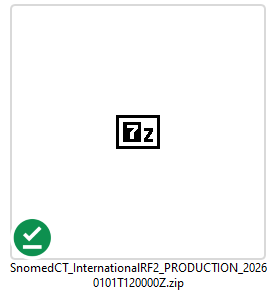 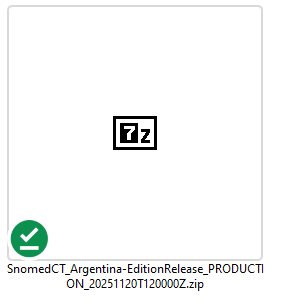


---

## 2) Configuración de elasticsearch:
* a) Descomprimir elasticsearch en una carpeta.
* b) configurar la carpeta del elasticsearch:

Ir a la carpeta: \config\ dentro de la carpeta en donde se instaló elasticsearch y modificar el archivo de configuración elasticsearch.yml:

```
└── elasticsearch-8.11.1
        └── config
                └── elasticsearch.yml
```

Abrir con notepad y editar el archivo **elasticsearch.yml**, agregamos:

```
# Desactivar seguridad para entorno local (Snowstorm), para que no nos dé error
xpack.security.enabled: false
xpack.security.enrollment.enabled: false

# Desactivar SSL/HTTPS
xpack.security.http.ssl.enabled: false
xpack.security.transport.ssl.enabled: false

al final de todo:
# Aumentar límite de cláusulas para grafos complejos (SNOMED)
# indices.query.bool.max_clause_count: 10240
# Aumentamos el límite a 40960 (4x lo anterior) para soportar la complejidad semántica
indices.query.bool.max_clause_count: 40960
```

El resto lo dejamos sin cambios.

---

## 3) Instalación de SNOMED-CT versión Internacional:
* Corremos elasticsearch:
Abrimos la consola de comandos de Windows y **nos posicionamos en la carpeta bin de elasticsearch**, en la cual está el archivo **elasticsearch.bat**:
```
elasticsearch-8.11.1
└── bin
    └── elasticsearch.bat
```
(Podemos hacer click en la barra de la carpeta y escribir cmd)

**tipeamos en el prompt**:
```
 elasticsearch
```
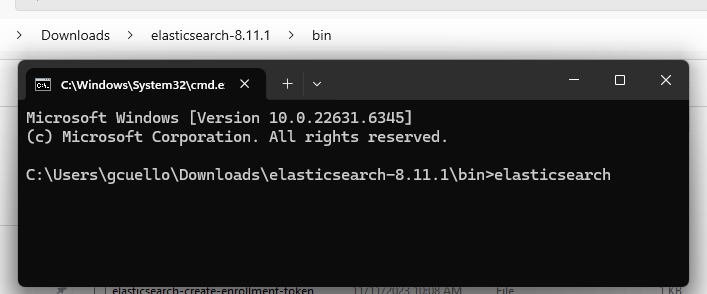

una vez iniciado elasticsearh lo podemos visitar en: http://127.0.0.1:9200/, vamos a ver al final el famoso tagline: "tagline" : **"You Know, for Search"**

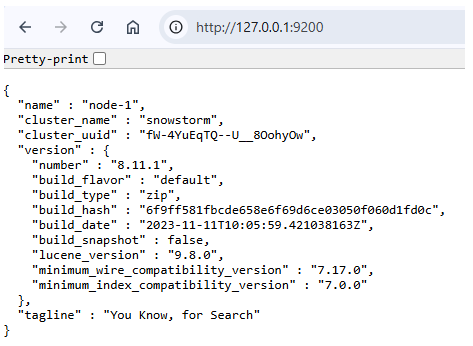



* En este caso tiene la carpeta data con los índices vacíos.

* Vamos a proceder a iniciar snowstorm, borramos los índices de elasticsearch (si hubo una instalación anterior fallida), e importamos la versión internacional de SNOMED-CT.

* Con el elasticsearch corriendo (no cerrar la ventana del prompt), nos posicionamos en la carpeta en donde tenemos el archivo jar del Snowstorm (en mi caso la puse en la misma carpeta del elastic).


```
elasticsearch-8.11.1
    └── snowstorm-10.10.1.jar
```

* NOTA: Elasticsearch 8.11 ya trae un Java 21 moderno incorporado. Vamos a usar "prestado" ese mismo ejecutable para correr Snowstorm y no tener que lidiar con el java local.

---

### Abrimos la consola (cmd) y tipeamos:

* **Nota**: mi ruta a las carpeta de trabajo es: **C:\Users\gcuello\Downloads**,
debes reemplazarla por la ruta de tu máquina.

```
"C:\Users\gcuello\Downloads\elasticsearch-8.11.1\jdk\bin\java.exe" -Xms4g -Xmx4g -jar snowstorm-10.10.1.jar --delete-indices --import="C:\Users\gcuello\Downloads\SnomedCT_InternationalRF2_PRODUCTION_20260101T120000Z.zip"

```
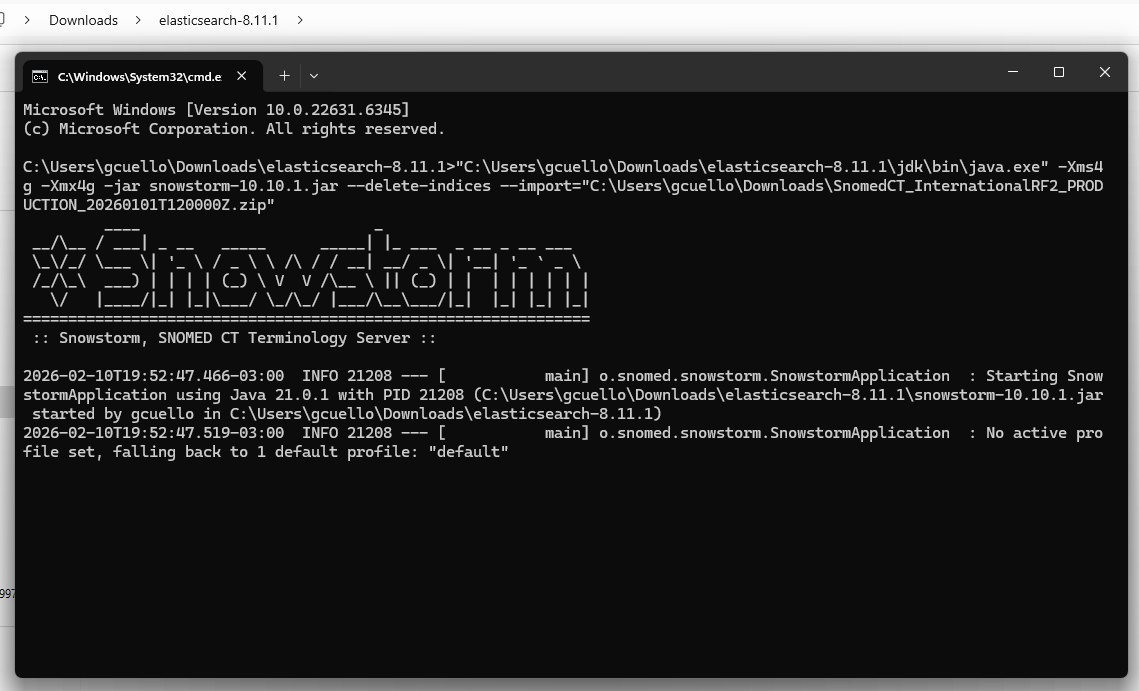

* Esto (utiliza el java de elastic, abre Snowstorm y comienza la importación del zip Snomed-CT International, en este caso la versión 20260101T120000)

* Ahora a esperar...el proceso puede llevar aproximadamente 1 hora, dependiendo de tu máquina.

* Aconsejo monitorear la memoria RAM del sistema para que no se crashee, y cerrar aquellas aplicaciones no esenciales que consuman RAM.

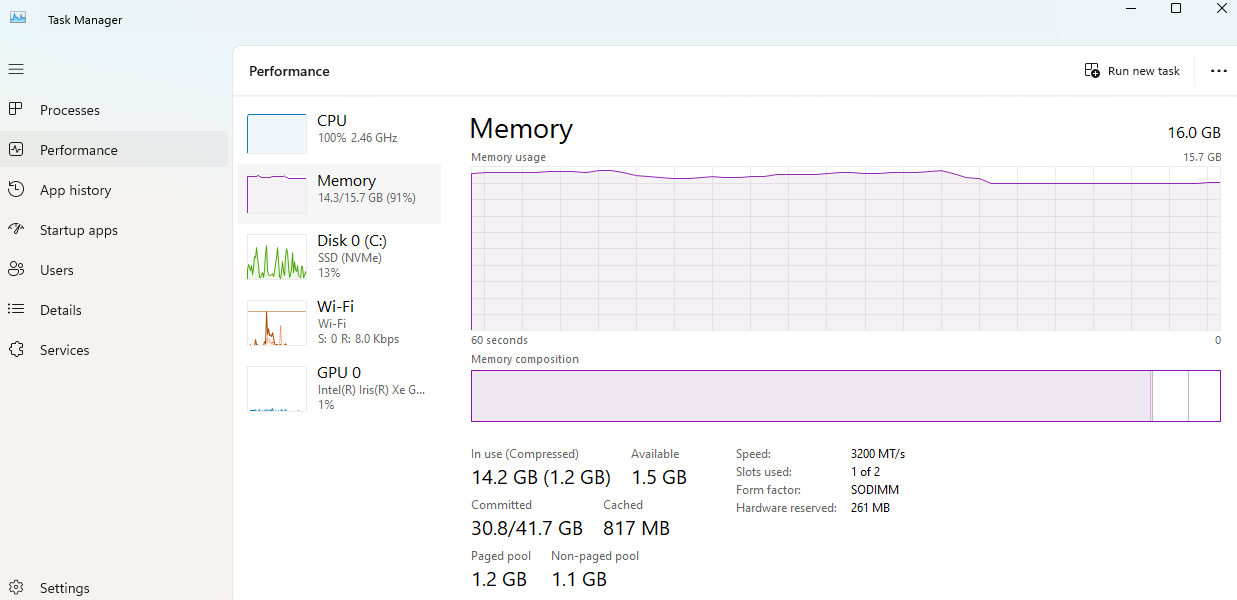

```
finalizado...>
```

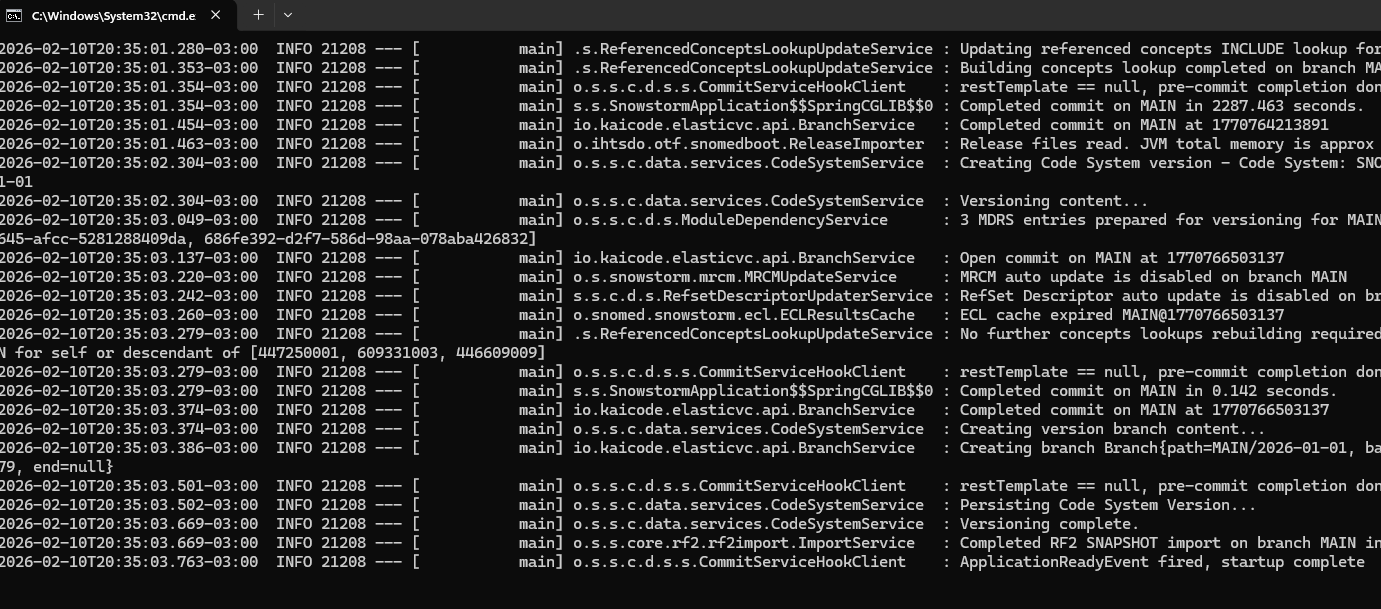

* Cerramos la ventana de comandos del Snowstorm.
* Cerramos la ventana de comandos del elasticsearch.

---

## Sugerencia:
* Recomiendo **hacer un backup completo de la carpeta del elasticsearch con los índices de la versión Internacional limpia cargados**.

* Si el siguiente paso falla, no tenemos que cargar todo desde cero.

* Además tenemos una versión de base a la que luego le podemos agregar la última versión Snapshot.




---



## 4) Instalación de versión Argentina de SNOMED-CT, con versión Internacional ya instalada:
* En mi caso es la versión Argentina descargada desde el NRC.
* Hacemos una importación de índices, **NO USAMOS DELETE**.

**Una vez más:**
* Corremos elasticsearch:
Abrimos la consola de comandos de Windows y nos posicionamos en la carpeta bin de elasticsearch, en la cual está el archivo elasticsearch.bat:
```
elasticsearch-8.11.1
└── bin
    └── elasticsearch.bat
```
(Podemos hacer click en la barra de la carpeta y escribir cmd)

#### **tipeamos en el prompt:**
```
 elasticsearch
```
---
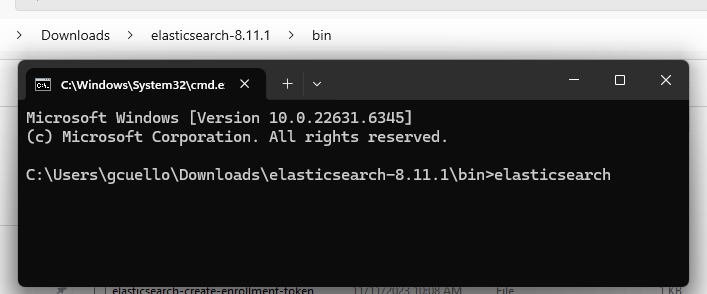
---
* una vez iniciado elasticsearh lo podemos visitar en: http://127.0.0.1:9200/, vamos a ver al final el famoso tagline: "tagline" : **"You Know, for Search"**

---
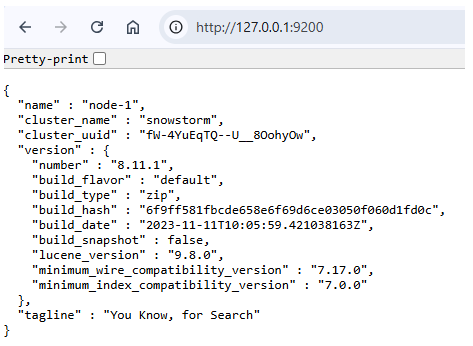
---

* En este caso la carpeta Data en elasticsearch ya pesa casi 3GB, con los índices de la versión internacional cargada.

---

* Procedemos a iniciar Snowstorm, para importar la versión Argentina de SNOMED-CT.

* Con el elasticsearch corriendo (no cerrar la ventana del prompt), nos posicionamos en la carpeta en donde tenemos el archivo jar del Snowstorm:
```
elasticsearch-8.11.1
└── snowstorm-10.10.1.jar
```
#### **Usando otra vez el java prestado, abrimos la consola (cmd) y tipeamos:**
```
"C:\Users\gcuello\Downloads\elasticsearch-8.11.1\jdk\bin\java.exe" -Xms4g -Xmx4g -jar snowstorm-10.10.1.jar --import="C:\Users\gcuello\Downloads\SnomedCT_Argentina-EditionRelease_PRODUCTION_20251120T120000Z.zip"

```
* **Utilizando el java de elastic, abre Snowstorm y comienza la importación del zip Snomed-CT Argentina, en este caso la versión 20251120T120000Z.**

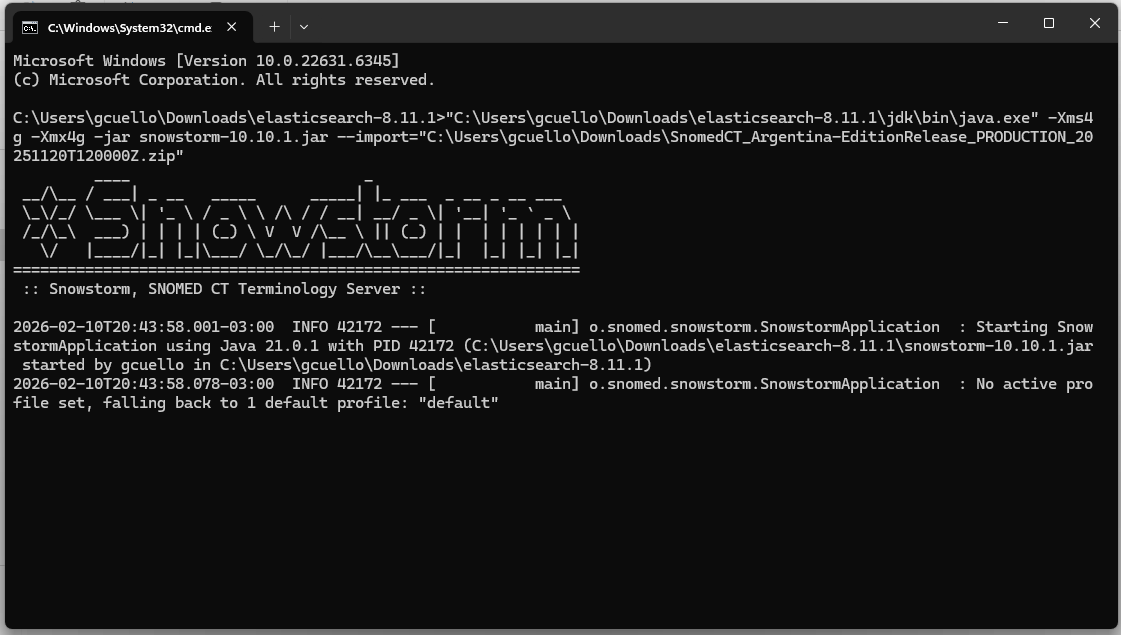

* Ahora a esperar...el proceso puede llevar menos de 1 hora.

* Aconsejo como antes, monitorear la memoria RAM del sistema para que no se crashee, y cerrar aquellas aplicaciones no esenciales que consuman RAM.

finalizado...>
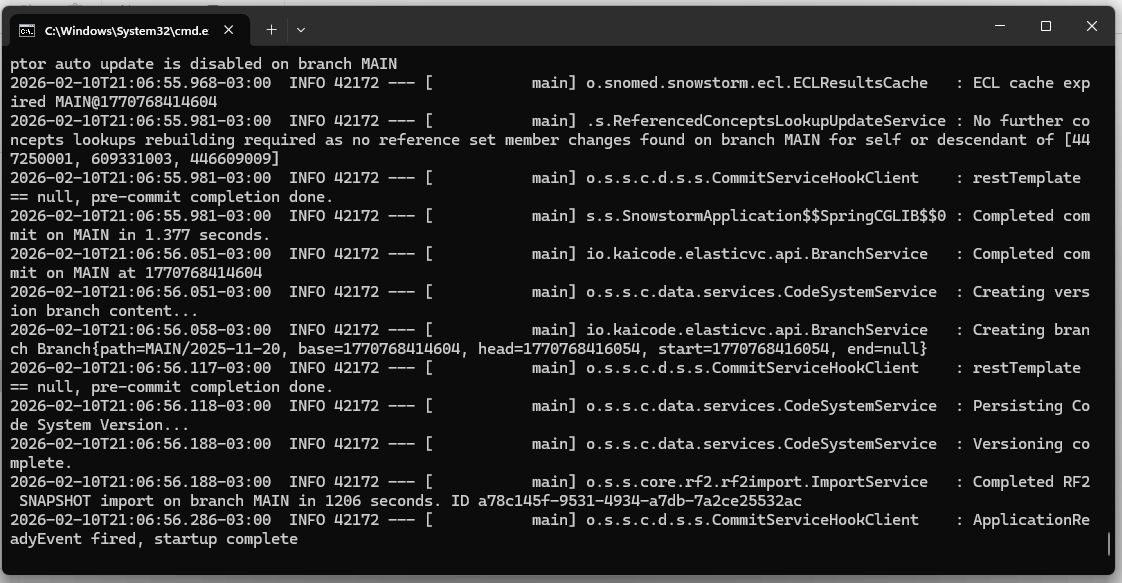


Cerramos la ventana de comandos del Snowstorm.
Cerramos la ventana de comandos del elasticsearch.



---

## Sugerencia:
* Ahora recomiendo hacer un backup completo de la carpeta del elasticsearch con los índices de la versión Internacional + la versión adicional cargada.

---

## 5) MODO LECTURA, visitamos la página del Snowstorm!

Una vez más:
### **Corremos elasticsearch:**
* Abrimos la consola de comandos de Windows y nos posicionamos en la carpeta bin de elasticsearch, en la cual está el archivo elasticsearch.bat:
```
elasticsearch-8.11.1
└── bin
    └── elasticsearch.bat
```
(Podemos hacer click en la barra de la carpeta y escribir cmd)

tipeamos en el prompt:
```
 elasticsearch
```
* Una vez iniciado elasticsearh lo podemos visitar en: http://127.0.0.1:9200/, vamos a ver al final el famoso tagline: "tagline" : "You Know, for Search"

---

### **Procedemos a iniciar Snowstorm:**
* Con el elasticsearch corriendo (no cerrar la ventana del prompt), nos posicionamos en la carpeta en donde tenemos el archivo jar del Snowstorm:
elasticsearch-8.11.1
└── snowstorm-10.10.1.jar

* Luego, **cargamos Snowstorm en modo lectura**:

* Abrimos la consola (cmd) y pegamos:
```
"C:\Users\gcuello\Downloads\elasticsearch-8.11.1\jdk\bin\java.exe" ^
  -jar snowstorm-10.10.1.jar ^
  readonly=true ^
  --cors.allowed-origins=http://localhost:8081 ^
  --cors.allowed-methods=GET,POST,PUT,DELETE,OPTIONS ^
  --cors.allowed-headers=*
```

---
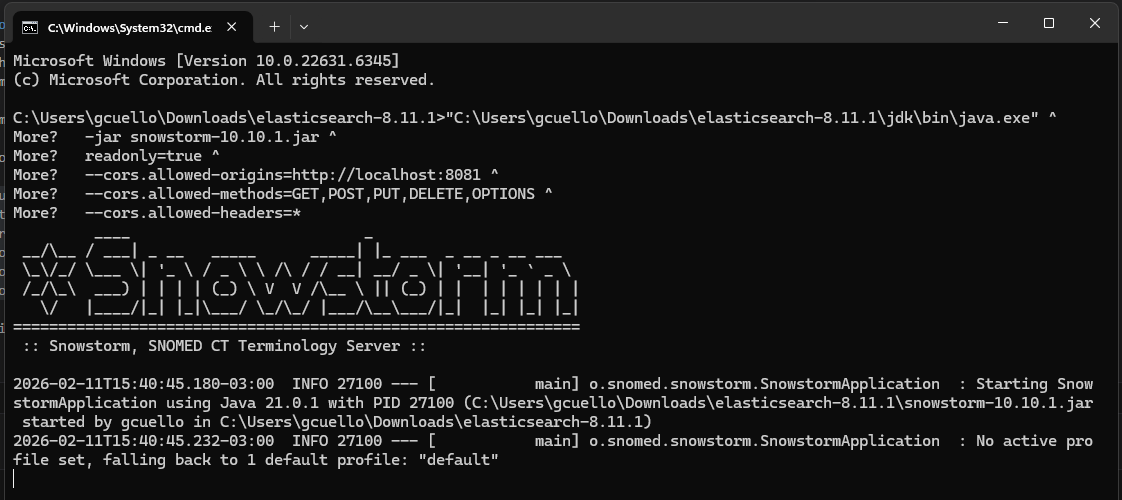
---

* Lo podemos visitar en http://localhost:8080
---
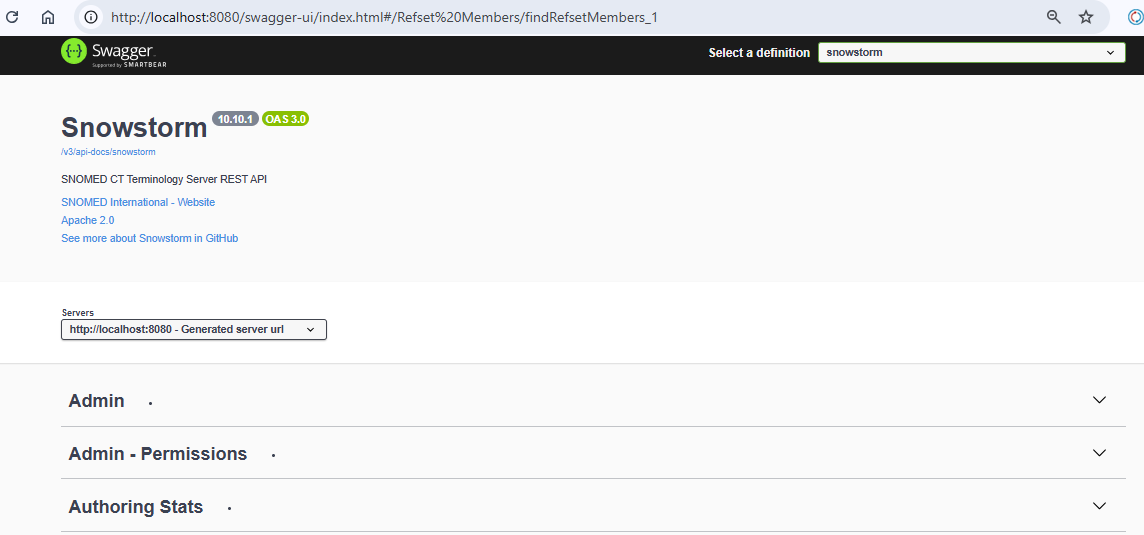
---

---

# Podemos hacer diferentes tipos de queries:
* Con algún script de Python,
* Búsqueda de conceptos directamente en el Swagger, o
* Utilizando algún frontend específico o app que se conecte al Snowstorm.

## Prueba Script de Consulta (Snowstorm) - SNOMED CT - Argentina

### Interactuamos con el servidor de terminología Snowstorm (instancia local de Argentina).

* El código desarrollado nos permite realizar búsquedas de conceptos clínicos, navegar por su jerarquía (ancestros y descendientes), explorar atributos relacionales y consultar mapeos a la clasificación CIE-10.

---

* ### El script está organizado en módulos funcionales que consumen la API REST de Snowstorm:
---
* 1- **Configuración de Conexión** (BASE_URL, BRANCH (por defecto MAIN) headers y lenguaje español).

* 2- **Búsqueda de Conceptos:** Implementa una búsqueda por texto (search_concepts) que filtra conceptos activos y publicados, devolviendo un DataFrame con el Identificador de Concepto (conceptId) y el Nombre Completamente Especificado (FSN).

* 3-**Selección Interactiva:** Permite al usuario elegir un concepto específico de los resultados de búsqueda para profundizar en su análisis.

* 4-**Recuperación de Sinónimos:** Extrae todas las descripciones de tipo SYNONYM asociadas a un código para comprender las diversas formas de referenciar un término clínico.

* 5-**Navegación Jerárquica:**
    * 5.1-**Ancestros:** Obtiene la línea jerárquica superior utilizando el endpoint /browser para identificar categorías generales.

    * 5.2-**Descendientes:** Recupera conceptos más específicos (hijos) utilizando el endpoint directo del branch con parámetros de estado.

* 6-**Análisis de Atributos:** Consulta las relaciones clínicas (ej: Sitio del hallazgo, Morfología asociada) para descomponer la definición lógica del concepto.

* 7-**Mapeo CIE-10:** Accede a los "Reference Sets" de mapas extendidos para obtener la equivalencia automática con códigos de la Clasificación Internacional de Enfermedades (ICD-10).🛠️

---

## Requisitos Técnicos:
--------------------------
* **Python 3.12+**
* Librerías: **requests**, **pandas**
* **elasticsearch-8.11.1** con los índices de SNOMED-CT importados corriendo en http://127.0.0.1:9200/
* Servidor **Snowstorm** en modo lectura corriendo en http://localhost:8080 (o la dirección configurada en BASE_URL).

## 📖 Estructura de las API Endpoints Utilizadas


```
Función         Endpoint de Snowstorm:
-------------------------------------
Búsqueda:       /{branch}/concepts?term={t}
Ancestros:      /browser/{branch}/concepts/{id}/ancestors
Descendientes:  /{branch}/concepts/{id}/descendants
Atributos:      /browser/{branch}/concepts/{id}
Mapeo CIE-10:   /{branch}/members?referencedComponentId={id}
```

## 📝 Ejemplo de Salida
* Al buscar un término como **"Diabetes mellitus"**, el script genera un informe técnico que incluye:
  * **FSN y ID:** Identificación inequívoca.
  * **Ancestros:** Como Trastorno del metabolismo de la glucosa.
  * **Descendientes:** Como Diabetes mellitus tipo 2.
  * **Atributos:** Relación con la Estructura del sistema endocrino.
  * **CIE-10:** Código correlativo, por ejemplo, E14.9.

---

# 1- Configuración de Conexión:
* Definimos los parámetros base como BASE_URL, BRANCH (por defecto MAIN) y los headers necesarios para recibir respuestas en español.

In [ ]:
import requests
import pandas as pd
from typing import List

BASE_URL = "http://localhost:8080"
BRANCH = "MAIN"
HEADERS = {
    "Accept": "application/json",
    "Accept-Language": "es"
}


---

# 2-Búsqueda de Conceptos:
## Implementa una búsqueda por texto (search_concepts) que filtra conceptos activos y publicados, devolviendo un DataFrame con el Identificador de Concepto (conceptId) y el Nombre Específico Completo (FSN - Full Specified Name).

In [ ]:
def search_concepts(term: str, limit: int = 50) -> pd.DataFrame:
    url = f"{BASE_URL}/{BRANCH}/concepts"
    params = {
        "term": term,
        "activeFilter": "true",
        "termActive": "true",
        "isPublished": "true",
        "includeLeafFlag": "false",
        "form": "inferred",
        "limit": limit
    }

    r = requests.get(url, params=params, headers=HEADERS)
    r.raise_for_status()

    items = r.json().get("items", [])

    rows = []
    for i, c in enumerate(items):
        rows.append({
            "opcion": i,
            "conceptId": c["conceptId"],
            "FSN": c["fsn"]["term"]
        })

    return pd.DataFrame(rows)


# 3-Selección Interactiva:
## Permite al usuario elegir un concepto específico de los resultados de búsqueda para profundizar en su análisis.

In [ ]:
search_term = input("Ingrese término a buscar (ej: dengue): ")

df_results = search_concepts(search_term)
display(df_results)

idx = int(input("\nSeleccione el número de opción: "))

# Extraemos el conceptId y el FSN usando la selección del usuario
concept_id = df_results.loc[df_results.opcion == idx, "conceptId"].values[0]
fsn_seleccionado = df_results.loc[df_results.opcion == idx, "FSN"].values[0]

# Formateamos la salida según tu requerimiento
print(f"\nConcepto seleccionado: {concept_id} |{fsn_seleccionado}|")


,opcion,conceptId,FSN
0,0,271737000,anemia (trastorno)
1,1,266888008,antecedente familiar de anemia (situación)
2,2,462166006,anemia fetal (trastorno)
3,3,234360003,anemia del vegano (trastorno)
4,4,387745008,anemia secundaria a la práctica deportiva (tra...
5,5,78997000,anemia megaloblástica asociada a vegetarianism...
6,6,80875006,anemia aclorhídrica (trastorno)
7,7,191268006,anemia crónica (trastorno)
8,8,30575002,anemia de Fanconi (trastorno)
9,9,11503009,anemia relativa (trastorno)



Concepto seleccionado: 191268006 |anemia crónica (trastorno)|


---

# 4-Recuperación de Sinónimos:
* Extrae todas las descripciones de tipo SYNONYM asociadas a un código para comprender las diversas formas de referenciar un término clínico.

In [ ]:

def get_descriptions(concept_id: str) -> pd.DataFrame:
    url = f"{BASE_URL}/{BRANCH}/concepts/{concept_id}/descriptions"
    r = requests.get(url, headers=HEADERS)
    r.raise_for_status()

    descriptions = r.json().get("conceptDescriptions", [])
    rows = []

    for d in descriptions:
        # Filtramos para mostrar solo descripciones en español ('es')
        if d.get("lang") == "es" and d.get("active"):
            # SNOMED usa IDs para la aceptabilidad:
            # 900000000000548007 = Preferred (Preferido)
            # 900000000000549004 = Acceptable (Aceptable)

            # Buscamos en el mapa de aceptabilidad
            acc_map = d.get("acceptabilityMap", {})
            # Tomamos el primer valor del mapa (usualmente hay uno por dialecto)
            acc_value = list(acc_map.values())[0] if acc_map else "N/A"

            tipo_esp = "Preferido" if acc_value == "900000000000548007" else "Aceptable"

            rows.append({
                "Término (Español)": d["term"],
                "Tipo": d["type"],
                "Aceptabilidad": tipo_esp
            })

    return pd.DataFrame(rows)


---

# 5-Navegación Jerárquica:
## 5.1-Ancestros:
* Obtiene la línea jerárquica superior utilizando el endpoint /browser para identificar categorías generales.

# Obtenemos todos los ancestros:

In [ ]:
# Todos los Ancestros:
def get_ancestors(concept_id: str) -> pd.DataFrame:
    # Se agrega "/browser" antes del BRANCH
    url = f"{BASE_URL}/browser/{BRANCH}/concepts/{concept_id}/ancestors"
    r = requests.get(url, headers=HEADERS)
    r.raise_for_status()

    # Nota: El formato de respuesta de los endpoints /browser
    # a veces devuelve una lista directa en lugar de un objeto con "items"
    data = r.json()
    items = data.get("items", data) if isinstance(data, dict) else data

    rows = []
    for c in items:
        rows.append({
            "conceptId": c["conceptId"],
            "FSN": c["fsn"]["term"]
        })

    return pd.DataFrame(rows)


# Obtenemos sólo los ancestros directos:

In [ ]:
# Ancestros Directos:
def get_parents(concept_id: str) -> pd.DataFrame:
    url = f"{BASE_URL}/browser/{BRANCH}/concepts/{concept_id}/parents"
    params = {"form": "inferred"}

    r = requests.get(url, params=params, headers=HEADERS)
    r.raise_for_status()

    # El servidor devuelve una lista directa []
    items = r.json()

    rows = []
    for c in items:
        rows.append({
            "conceptId": c["conceptId"],
            "FSN": c["fsn"]["term"]
        })

    return pd.DataFrame(rows)


# 5.2-Descendientes:
* Recupera conceptos más específicos (hijos) utilizando el endpoint directo del branch con parámetros de estado.

In [ ]:
def get_children(concept_id: str) -> pd.DataFrame:
    url = f"{BASE_URL}/browser/{BRANCH}/concepts/{concept_id}/children"
    params = {
        "form": "inferred",
        "includeDescendantCount": "true"
    }

    r = requests.get(url, params=params, headers=HEADERS)
    r.raise_for_status()

    rows = []
    for c in r.json():
        rows.append({
            "conceptId": c["conceptId"],
            "FSN": c["fsn"]["term"],
            "PT": c.get("pt", {}).get("term"),
            "descendantCount": c.get("descendantCount"),
            "isLeaf": c.get("isLeafInferred")
        })

    return pd.DataFrame(rows)

---

# 6-Análisis de Atributos:
* Consulta las relaciones clínicas (ej: Sitio del hallazgo, Morfología asociada) para descomponer la definición lógica del concepto.

In [ ]:
def get_attributes(concept_id: str) -> pd.DataFrame:
    url = f"{BASE_URL}/{BRANCH}/relationships"
    params = {
        "active": "true",
        "source": concept_id,
        "limit": 100
    }

    r = requests.get(url, params=params, headers=HEADERS)
    r.raise_for_status()

    rows = []
    for rel in r.json().get("items", []):
        rows.append({
            "Tipo de atributo": rel["type"]["fsn"]["term"],
            "Valor del atributo": rel["target"]["fsn"]["term"]
        })

    return pd.DataFrame(rows)


---

# 7-Mapeo CIE-10:
* Accede a los "Reference Sets" (Reference Set Members – ExtendedMap) de mapas extendidos para obtener la equivalencia automática con códigos de la Clasificación Internacional de Enfermedades (ICD-10).🛠️

In [ ]:
def get_cie10_map(concept_id: str) -> pd.DataFrame:
    url = f"{BASE_URL}/{BRANCH}/members"
    params = {
        "referencedComponentId": concept_id,
        "limit": 100
    }

    r = requests.get(url, headers=HEADERS, params=params)
    r.raise_for_status()

    rows = []
    for m in r.json().get("items", []):
        if m.get("refsetId") == "447562003":  # SNOMED → ICD-10 Extended Map
            rows.append({
                "Codigo CIE-10": m["additionalFields"].get("mapTarget"),
                "mapAdvice": m["additionalFields"].get("mapAdvice"),
                "mapRule": m["additionalFields"].get("mapRule"),
                "mapCategoryId": m["additionalFields"].get("mapCategoryId")
            })

    return pd.DataFrame(rows)


---

# Presentación de resultados de la búsqueda:

In [ ]:
def print_concept(idx, df_results, concept_id):

    print("\n=== RESULTADO DE LA BÚSQUEDA ===\n")

    print("FSN:", df_results.loc[idx, "FSN"])
    print("conceptId:", concept_id)

    print("\nDESCRIPCIONES EN ESPAÑOL:")
    df_desc = get_descriptions(concept_id)
    if not df_desc.empty:
        display(df_desc)
    else:
        print("No se encontraron descripciones activas en español.")

    print("\nANCESTROS:")
    display(get_ancestors(concept_id))

    print("\nANCESTROS DIRECTOS:")
    display(get_parents(concept_id))

    print("\nDESCENDIENTES:")
    df_children = get_children(concept_id)
    if not df_children.empty:
        display(df_children)
    else:
        print("Resultado: No tiene descendientes (fin de la jerarquía).")

    print("\nATRIBUTOS:")
    display(get_attributes(concept_id))

    print("\nMAPEO CIE-10:")
    display(get_cie10_map(concept_id))


In [ ]:
print_concept(idx, df_results, concept_id)


=== RESULTADO DE LA BÚSQUEDA ===

FSN: trastorno hipertensivo arterial sistémico (trastorno)
conceptId: 38341003

DESCRIPCIONES EN ESPAÑOL:


,Término (Español),Tipo,Aceptabilidad
0,trastorno hipertensivo arterial sistémico,SYNONYM,Aceptable
1,enfermedad vascular hipertensiva,SYNONYM,Aceptable
2,enfermedad hipertensiva,SYNONYM,Aceptable
3,trastorno hipertensivo arterial sistémico (tra...,FSN,Aceptable
4,HTA - hipertensión arterial,SYNONYM,Aceptable
5,degeneración vascular hipertensiva,SYNONYM,Aceptable
6,hipertensión arterial,SYNONYM,Aceptable



ANCESTROS:


,conceptId,FSN
0,404684003,hallazgo clínico (hallazgo)
1,366157005,hallazgo en la medición cardiovascular (hallazgo)
2,362965005,trastorno de sistema corporal (trastorno)
3,138875005,concepto de SNOMED CT (SNOMED RT+CTV3)
4,106063007,hallazgo en el sistema cardiovascular (hallazgo)
5,64572001,enfermedad (trastorno)
6,49601007,trastorno del aparato cardiovascular (trastorno)



ANCESTROS DIRECTOS:


,conceptId,FSN
0,366157005,hallazgo en la medición cardiovascular (hallazgo)
1,49601007,trastorno del aparato cardiovascular (trastorno)



DESCENDIENTES:


,conceptId,FSN,PT,descendantCount,isLeaf
0,1078301000112109,hipertensión con intolerancia a múltiples fárm...,hipertensión con intolerancia a múltiples fárm...,0,True
1,845891000000103,hipertensión resistente a fármacos (trastorno),hipertensión resistente a fármacos,0,True
2,1356877007,hipertensión estable (trastorno),hipertensión estable,0,True
3,720568003,síndrome de braquidactilia e hipertensión arte...,síndrome de braquidactilia e hipertensión arte...,0,True
4,712832005,hipertensión en decúbito supino (trastorno),hipertensión en decúbito supino,0,True
5,706882009,crisis hipertensiva (trastorno),crisis hipertensiva,9,False
6,697929007,hipertensión intermitente (trastorno),hipertensión intermitente,4,False
7,472749004,hipertensión de seno coronario como complicaci...,hipertensión de seno coronario como complicaci...,0,True
8,429198000,hipertensión de esfuerzo (trastorno),hipertensión de esfuerzo,0,True
9,397748008,hipertensión con albuminuria (trastorno),hipertensión con albuminuria,0,True



ATRIBUTOS:


,Tipo de atributo,Valor del atributo
0,es un[a] (atributo),trastorno del aparato cardiovascular (trastorno)
1,sitio del hallazgo (atributo),estructura del sistema circulatorio sistémico ...
2,es un[a] (atributo),hallazgo en la medición cardiovascular (hallazgo)
3,tiene interpretación (atributo),aumentado (calificador)
4,interpreta (atributo),presión sanguínea (entidad observable)



MAPEO CIE-10:


,Codigo CIE-10,mapAdvice,mapRule,mapCategoryId
0,I10,ALWAYS I10,TRUE,447637006


In [ ]:
print_concept(idx, df_results, concept_id)


=== RESULTADO DE LA BÚSQUEDA ===

FSN: infarto de miocardio (trastorno)
conceptId: 22298006

DESCRIPCIONES EN ESPAÑOL:


,Término (Español),Tipo,Aceptabilidad
0,infarto de miocardio,SYNONYM,Aceptable
1,infarto de miocardio (trastorno),FSN,Aceptable
2,infarto cardíaco,SYNONYM,Aceptable
3,ataque al corazón,SYNONYM,Aceptable
4,infarto de corazón,SYNONYM,Aceptable



ANCESTROS:


,conceptId,FSN
0,733217006,lesión traumática de órgano intratorácico (tra...
1,609623002,hallazgo relacionado con el segmento superior ...
2,609622007,trastorno del segmento torácico del tronco (tr...
3,609410002,necrosis de sitio anatómico (trastorno)
4,417163006,lesión traumática o no traumática (trastorno)
5,414545008,cardiopatía isquémica (trastorno)
6,406123005,hallazgo relacionado con una estructura viscer...
7,404684003,hallazgo clínico (hallazgo)
8,362965005,trastorno de sistema corporal (trastorno)
9,302292003,hallazgo relacionado con la estructura del tro...



ANCESTROS DIRECTOS:


,conceptId,FSN
0,414545008,cardiopatía isquémica (trastorno)
1,251061000,necrosis de miocardio (trastorno)



DESCENDIENTES:


,conceptId,FSN,PT,descendantCount,isLeaf
0,726499301000119105,infarto de miocardio debido a enfermedad atero...,infarto de miocardio debido a enfermedad atero...,0,True
1,16837681000119104,infarto de miocardio debido a isquemia por dem...,infarto de miocardio debido a isquemia por dem...,1,False
2,879955009,infarto de miocardio sin lesiones coronarias o...,infarto de miocardio sin lesiones coronarias o...,1,False
3,428196007,infarto e isquemia miocárdica combinados (tras...,infarto e isquemia miocárdica combinados,0,True
4,418044006,infarto de miocardio en fase de recuperación (...,infarto de miocardio en fase de recuperación,0,True
5,394710008,primer infarto de miocardio (trastorno),primer infarto de miocardio,0,True
6,314207007,infarto de miocardio sin onda Q (trastorno),infarto de miocardio sin onda Q,7,False
7,233843008,infarto miocárdico silente (trastorno),infarto miocárdico silente,0,True
8,194856005,infarto de miocardio subsecuente (trastorno),infarto de miocardio subsecuente,10,False
9,194802003,infarto de miocardio posterior verdadero (tras...,infarto de miocardio posterior verdadero,0,True



ATRIBUTOS:


,Tipo de atributo,Valor del atributo
0,es un[a] (atributo),necrosis de miocardio (trastorno)
1,morfología asociada (atributo),infarto (anomalía morfológica)
2,sitio del hallazgo (atributo),estructura del miocardio (estructura corporal)
3,es un[a] (atributo),cardiopatía isquémica (trastorno)



MAPEO CIE-10:


,Codigo CIE-10,mapAdvice,mapRule,mapCategoryId
0,I21.9,ALWAYS I21.9,TRUE,447637006


In [ ]:
print_concept(idx, df_results, concept_id)


=== RESULTADO DE LA BÚSQUEDA ===

FSN: anemia crónica (trastorno)
conceptId: 191268006

DESCRIPCIONES EN ESPAÑOL:


,Término (Español),Tipo,Aceptabilidad
0,anemia crónica (trastorno),FSN,Aceptable
1,anemia crónica,SYNONYM,Aceptable



ANCESTROS:


,conceptId,FSN
0,414022008,trastorno de componente celular sanguíneo (tra...
1,404684003,hallazgo clínico (hallazgo)
2,299691001,hallazgo relacionado con el sistema inmunitari...
3,271737000,anemia (trastorno)
4,138875005,concepto de SNOMED CT (SNOMED RT+CTV3)
5,64572001,enfermedad (trastorno)
6,27624003,enfermedad crónica (trastorno)



ANCESTROS DIRECTOS:


,conceptId,FSN
0,271737000,anemia (trastorno)
1,27624003,enfermedad crónica (trastorno)



DESCENDIENTES:


,conceptId,FSN,PT,descendantCount,isLeaf
0,691421000119108,anemia concomitante con enfermedad renal cróni...,anemia concomitante con enfermedad renal cróni...,0,True
1,707480001,anemia hemolítica crónica (trastorno),anemia hemolítica crónica,6,False
2,707324008,anemia con enfermedad renal terminal concomita...,anemia con enfermedad renal terminal concomita...,0,True
3,703540008,"osteomielitis multifocal recurrente crónica, a...","osteomielitis multifocal recurrente crónica, a...",0,True
4,291262006,anemia crónica simple (trastorno),anemia crónica simple,0,True
5,90414007,aplasia eritrocitaria pura adquirida crónica (...,aplasia eritrocitaria pura adquirida crónica,0,True
6,49708008,anemia asociada con insuficiencia renal crónic...,anemia asociada con insuficiencia renal crónica,1,False



ATRIBUTOS:


,Tipo de atributo,Valor del atributo
0,es un[a] (atributo),anemia (trastorno)
1,es un[a] (atributo),enfermedad crónica (trastorno)
2,curso clínico (atributo),crónico (calificador)



MAPEO CIE-10:


,Codigo CIE-10,mapAdvice,mapRule,mapCategoryId
0,,MAP SOURCE CONCEPT CANNOT BE CLASSIFIED WITH A...,OTHERWISE TRUE,447638001
1,D63.8,IF ANEMIA CO-OCCURRENT AND DUE TO CHRONIC KIDN...,IFA 707323002 | Anemia co-occurrent and due to...,447639009
2,,MAP SOURCE CONCEPT CANNOT BE CLASSIFIED WITH A...,OTHERWISE TRUE,447638001
3,D59.1,IF CHRONIC IDIOPATHIC AUTOIMMUNE HEMOLYTIC ANE...,IFA 22098000 | Chronic idiopathic autoimmune h...,447639009
4,D53.9,IF SIMPLE CHRONIC ANEMIA CHOOSE D53.9 | MAP OF...,IFA 291262006 | Simple chronic anemia (disorde...,447639009
5,D58.9,IF CHRONIC HEMOLYTIC ANEMIA CHOOSE D58.9 | MAP...,IFA 707480001 | Chronic hemolytic anemia (diso...,447639009
6,D58.9,IF HEMOLYTIC ANEMIA WITH EMPHYSEMA AND CUTIS L...,IFA 60805002 | Hemolytic anemia with emphysema...,447639009
7,N18.9,IF ANEMIA CO-OCCURRENT AND DUE TO CHRONIC KIDN...,IFA 707323002 | Anemia co-occurrent and due to...,447639009
8,D64.9,ALWAYS D64.9,TRUE,447637006
9,D64.9,ALWAYS D64.9,OTHERWISE TRUE,447637006
